# Trapped Ion Motion

For the Linear Paul trap, the electric potential (far from sources and near center of trap) due to the axial static potentials and experience by a charged particle of charge $Q$, mass $m$ would be

$$
\Phi_z = \dfrac{\kappa U_0}{z_0^2} \left[z^2 - \frac{1}{2} \left(x^2+y^2\right)\right]
$$

where $U_0$ is the voltage of the static potentials, $z_0$ is the distance from the trapped particle to the static electrode, and $\kappa$ is a geometric factor. The radial confinement comes from an rf field producing an electric potential

$$
\Phi_r = \dfrac{V_0 \cos{\Omega_T t + U_r}}{2} \left( 1+\dfrac{x^2-y^2}{R^2} \right)
$$

where $V_0$ is the amplitude of the rf potential, $\Omega_T$ is the rf's frequency, $U_r$ is a small dc bias that is usefull in breaking the radial degeneracy, $R$ is the disance from the trap center to the surface of the electrode delivering the rf.

[1] https://tf.nist.gov/general/pdf/1275.pdf

If we put that into a Lagrangian, we get the equations of motion (where x and y are in the radial direction and z is in the axial direction)

$$
\begin{align}
\dfrac{d^2x}{dt^2} + \left[a_x-2q_x\cos{\Omega_T t}\right]x & =0\\
\dfrac{d^2y}{dt^2} + \left[a_y-2q_y\cos{\Omega_T t}\right]y & =0\\
\dfrac{d^2z}{dt^2} & =\dfrac{2 Q\kappa U_0}{m z_0^2}z\\
\end{align}
$$

where $a_{x,y} = \dfrac{Q \kappa U_0}{m z_0^2}$, $q_x = -q_y = \dfrac{Q V_0}{2 m R^2}$, $z_0$ being the distance from the ion to the static electrodes.

The z direction is simple. We define $\omega_z^2 = \dfrac{2 Q\kappa U_0}{m z_0^2}$ and call it a harmonic oscillator--because it is.

The x and y directions are in the form of Mathieu equations. Since $a_i < q_i^2 \ll 1$, we can expand the solution in powers of $q_i$. However, I work in a lab where $q_i$ may become large, so I'm interested in an "fuller" solution.





In [210]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import linregress
from scipy.integrate import odeint

import random

In [211]:
# Physics constants for a 171Yb+ trapped ion
m = 170.936323 * 1.66054e-27
Q = 1.60217662e-19

# Trap parameters
R = 250e-6 * np.sqrt(2)
z0 = 670e-6
kappa = 0.35
U0 = 24.0
V0 = 350.0
OmegaT = 2*np.pi * 21e6

## Z Axis
The z-axis has the simpliest motion so we'll start there. We can easily check the results as the solution is exactly solvable.

We'll use the "trick" of turning a 2nd order differential equations into two first order differential equations. We'll use $z^{\prime} = y$

expected oscillation frequency (Hz) 731498.2898883052


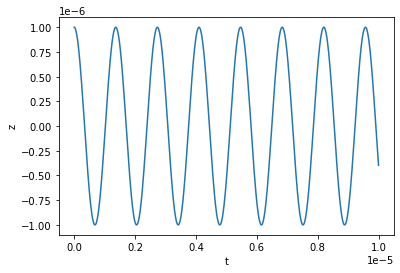

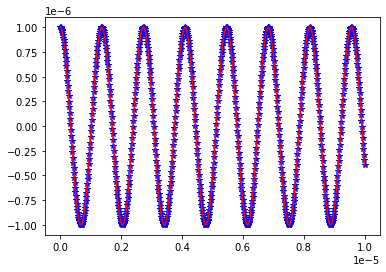

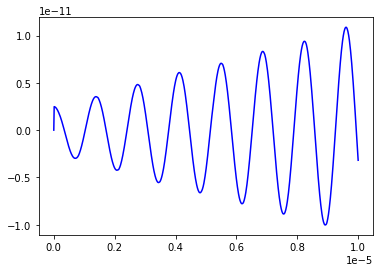

In [272]:
initial_z = 1e-6  # initial ion position
initial_vz = 0  # initial ion speed
constants = 2*Q*kappa*U0/m/z0**2  # compute right-hand side of z equation

print('expected oscillation frequency (Hz)', np.sqrt(constants)/2/np.pi)

# Here U is a vector such that z=U[0] and y=U[1]; returns [z', y']
def dU_dt(U, t):
    return [U[1], -constants*U[0]]

U_initial = [initial_z, initial_vz]
ts = np.linspace(0, 10, 800)*1e-6
Us = odeint(dU_dt, U_initial, ts)
zs = Us[:,0]

plt.plot(ts, zs)
plt.xlabel("t")
plt.ylabel("z")
plt.show()

plt.plot(ts, np.max(zs) * np.cos(np.sqrt(constants) * ts), '*b')
plt.plot(ts, zs, '-r')
plt.show()

plt.plot(ts, np.max(zs) * np.cos(np.sqrt(constants) * ts) - zs, '-b')
plt.show()

## X/Y Axis
We'll use the same trick of turning the 2nd order derivative equation into two 1st order derivative equations.

$$
\begin{align}
\dfrac{d^2x}{dt^2} + \left[a_x-2q_x\cos{\Omega_T t}\right]x & =0\\
\dfrac{d^2y}{dt^2} + \left[a_y-2q_y\cos{\Omega_T t}\right]y & =0\\
\end{align}
$$

with $a_{x,y} = \dfrac{Q \kappa U_0}{m z_0^2}$, $q_x = -q_y = \dfrac{Q V_0}{2 m R^2}$

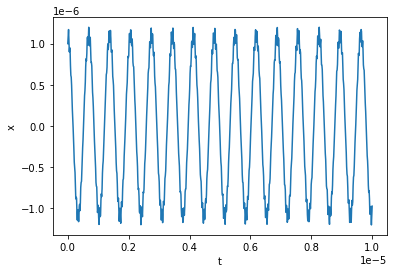

In [261]:
initial_x = 1e-6  # initial ion position
initial_vx = 0  # initial ion speed

a = (Q*kappa*U0)/(m*z0**2)
qx = (V0*Q)/(2*m*R**2)

# print('expected secular frequency (MHz)', np.sqrt(2/OmegaT**2 * qx**2 - a)/2/np.pi*1e-6)

def dU_dt(U, t):
    return [U[1], (-a + 2*qx*np.cos(OmegaT*t))*U[0]]

U_initial = [initial_x, initial_vx]
Us = odeint(dU_dt, U_initial, ts)
xs = Us[:,0]

plt.plot(ts, xs)
plt.xlabel("t")
plt.ylabel("x")
plt.show()


expected secular frequency (MHz) 1.244815578794277


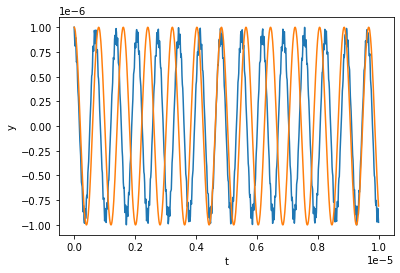

In [275]:
initial_y = 1e-6  # initial ion position
initial_vy = 0  # initial ion speed

a = (Q*kappa*U0)/(m*z0**2)
qy = -(V0*Q)/(2*m*R**2)

print('expected secular frequency (MHz)', np.sqrt(2/OmegaT**2 * qy**2 - a)/2/np.pi*1e-6)

def dU_dt(U, t):
    return [U[1], (-a + 2*qy*np.cos(OmegaT*t))*U[0]]

U_initial = [initial_y, initial_vy]
Us = odeint(dU_dt, U_initial, ts)
ys = Us[:,0]

plt.plot(ts, ys)
plt.plot(ts, np.cos(1.24e6*2*np.pi * ts)*1e-6)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

In [260]:

qi = 2*V0*Q/OmegaT**2/m/R**2
np.sqrt(Q/m*(qi*V0/4/R**2 - kappa*U0/z0**2))


7821406.954828454

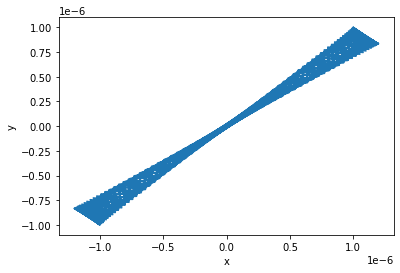

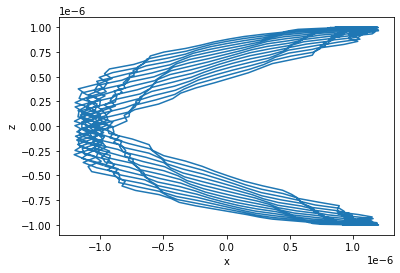

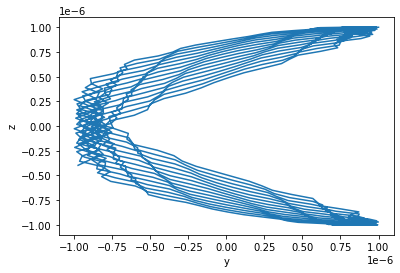

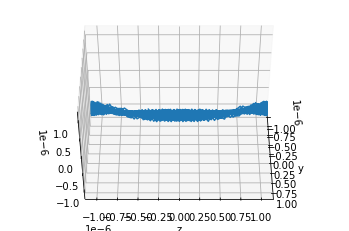

In [271]:
# Plot motion from different view points
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(xs, zs)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

plt.plot(ys, zs)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=45, azim=0)
plt.plot(ys, zs, xs)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

# Below is OLD and needs to be fixed later

# Normal Modes: Ion Chain
Here we estimate normal modes of ion chains and ion pancakes using classical estimations

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import linregress

The energy potential for N identical ions in a linear Paul trap can be estimated as identical masses connected in a 3D harmonic potential. Each ion interacts through it's positive electric charge.

$$
V(x,y) = \sum_{i=1}^{N}\left(\frac{1}{2}m \omega_x^2 x_i^2 + \frac{1}{2}m \omega_y^2 y_i^2 + \frac{1}{2}m \omega_z^2 z_i^2\right) + \sum_{i<j}^{N}\frac{e^2}{4\pi \epsilon_0 \sqrt{(x_i-x_j)^2 + (y_i-y_j)^2+ (z_i-z_j)^2}}
$$

There are $3N + \sim N^2$ terms in the potential making the problem $\sim O(N^2)$ hard.

In [202]:
# number of ions
N = 19

# constants
m = 170.936323 * 1.66054e-27
e = 1.60217662e-19
epsilon_0 = 8.8541878128e-12

# harmonic frequencies
wx = 2 * np.pi * 0.4e6
wy = wx
wz = 2 * np.pi * 1e6

def potential_energy(positions, wx=wx, wy=wy, wz=wz, N=N, m=m, e=e, epsilon_0=epsilon_0):
    xs = positions[:N]
    ys = positions[N:2*N]
    zs = positions[2*N:3*N]
    
    # harmonic energy
    harm_energy = np.sum(1/2 * m * (wx**2 * xs**2 + wy**2 * ys**2 + wz**2 * zs**2))

    # electronic interaction
    interaction = 0
    for i in range(N):
        for j in range(i+1,N):
            interaction += 1/np.sqrt((xs[i]-xs[j])**2 + (ys[i]-ys[j])**2 + (zs[i]-zs[j])**2)
    interaction = e**2/4/np.pi/epsilon_0 * interaction

    return harm_energy + interaction

print('alpha', wz/wx)

alpha 2.5


In [206]:
# Initial guess and minimization
xs_0 = random.sample(range(-N,N), N)
ys_0 = random.sample(range(-N,N), N)
zs_0 = [0] * N

x0 = np.array(xs_0 + ys_0 + zs_0) * 1e-6
res = minimize(potential_energy, x0, method='Nelder-Mead', tol=1e-8)

# Educated guess. 2nd minimization
x0 = res.x
res = minimize(potential_energy, x0, method='Nelder-Mead', tol=1e-10)
res.x

# Educated guess. 3rd minimization
x0 = res.x
res = minimize(potential_energy, x0, method='Nelder-Mead', tol=1e-15)
res.x

array([ 1.22105370e-05,  4.29462238e-06,  6.45458851e-06,  3.31080429e-06,
       -5.49516176e-08, -5.85363682e-06, -1.13880834e-05, -1.20370806e-05,
       -3.68401008e-06, -5.84661930e-06,  9.41368181e-06, -6.58465463e-06,
        6.52991171e-06, -9.24367548e-06, -1.20653666e-06, -6.24193994e-08,
        1.10402724e-05, -1.59379020e-06,  3.97412157e-06,  1.78089257e-06,
       -4.97592417e-06,  2.27584503e-07,  1.16902473e-05,  7.39696445e-08,
       -3.04935364e-06, -5.18604844e-06,  1.59513318e-06,  1.19320255e-05,
        2.67878425e-06,  8.01883076e-06, -1.01567439e-05, -1.05426906e-05,
        7.96928727e-06, -6.27372687e-06, -1.22801025e-05, -5.08729392e-06,
        6.42108421e-06,  5.22119197e-06,  6.57077398e-08, -1.15096661e-08,
       -7.73011302e-08, -9.07112370e-08, -1.40425734e-08,  1.00914947e-07,
       -2.17837468e-08, -1.98843507e-08, -4.48678108e-09, -1.59597524e-07,
       -6.90070877e-08, -8.38397996e-08,  1.00311042e-07,  1.71456625e-07,
        1.24973622e-08,  

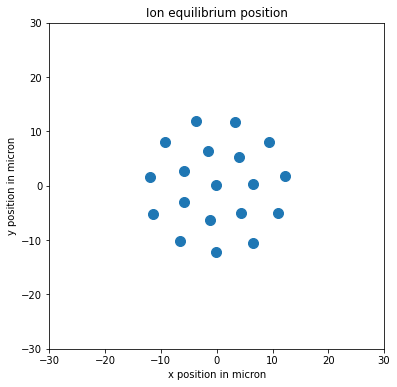

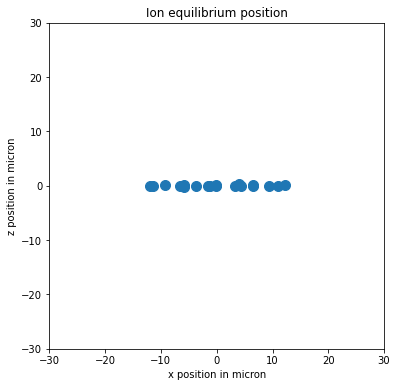

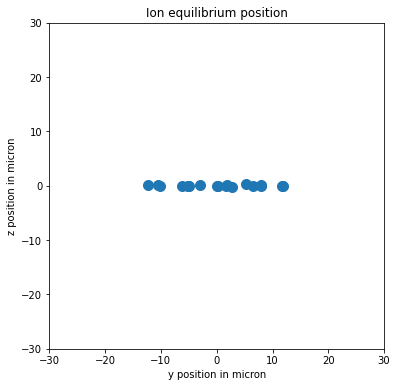

In [207]:
# Plot radial plane
xs = res.x[:N]
ys = res.x[N:2*N]
zs = res.x[2*N:3*N]

plt.figure(figsize=(6,6))
plt.scatter(xs*1e6, ys*1e6, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('x position in micron')
plt.ylabel('y position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(xs*1e6, zs*1e6, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('x position in micron')
plt.ylabel('z position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(ys*1e6, zs*1e6, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('y position in micron')
plt.ylabel('z position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

### Axial Normal Modes
Ions motion can be used to send quantum information through the crystal. To do this, it's essential to know the normal modes of the ions. Let's compute them based on the ion positions, starting with the axial modes.

The energy potential for N identical ions in a linear Paul trap can be estimated as identical masses connected in a 3D harmonic potential. Each ion interacts through it's positive electric charge and thus the Lagrangian (allow the axial direction).

$$
L = \frac{1}{2}m\sum_{i=1}^{N}\dot{z_i}^2 - \sum_{i=1}^{N}\frac{1}{2}m \omega_z^2 z_i^2 - \frac{e^2}{4\pi \epsilon_0}\sum_i^N\sum_{i\neq j}^{N}\frac{1}{r_{ij}}
$$

where $r_{ij} = \sqrt{(x_i-x_j)^2+(y_i-y_j)^2}$. By diagonalizing the equations of motion, we can compute the normal modes and frequencies. The equations of motion are

$$
\sum_{i=1}^{N}\ddot{z_i} = - \sum_{i=1}^{N} \omega_z^2 z_i - \frac{e^2}{4\pi \epsilon_0 m}\left(\sum_{i\neq j}^{N}\frac{z_j}{r_{ij}^3} - \sum_{i\neq j}^{N}\frac{2 z_i}{r_{ij}^3}\right)
$$

e.g. i = 1

$$
\ddot{z_1} = -\omega_z^2 z_1 - \frac{e^2}{4\pi \epsilon_0 m}\left(\sum_{j=2}^{N}\frac{z_j}{r_{1j}^3} - \sum_{j=2}^{N}\frac{2 z_1}{r_{1j}^3}\right)
$$

In [169]:
# Compute modes
def normal_modes(w):
    prefactor = e**2/4/np.pi/epsilon_0/m

    # Add harmonic terms to matrix
    matrix = -w**2 * np.diag(np.ones(N))

    # Add interaction diagonal terms
    for i in range(N):
        interact_diag = 0
        for j in range(N):
            if i==j:
                continue
            interact_diag += 2/((xs[i]-xs[j])**2+(ys[i]-ys[j])**2)**(3/2)
        interact_diag *= prefactor
        matrix[i,i] += interact_diag

    # Add interaction cross terms 
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
            cross_term = -prefactor/((xs[i]-xs[j])**2+(ys[i]-ys[j])**2)**(3/2)
            matrix[i,j] = cross_term
    return matrix

# Compute normal modes and frequencies
z_vals, z_vecs = np.linalg.eig(normal_modes(wz))
z_freqs = np.round(np.sqrt(np.abs(z_vals))/2/np.pi)
z_freqs, np.round(z_vecs, 4)

(array([977650., 940853., 940929., 956950., 957019.]),
 array([[-0.4468, -0.5153, -0.3705, -0.4525,  0.4391],
        [-0.4476,  0.2018,  0.5981, -0.5617, -0.2928],
        [-0.4471,  0.6309, -0.0061,  0.28  ,  0.5689],
        [-0.4479,  0.1904, -0.6006,  0.1113, -0.6245],
        [-0.4466, -0.5094,  0.3797,  0.6237, -0.089 ]]))

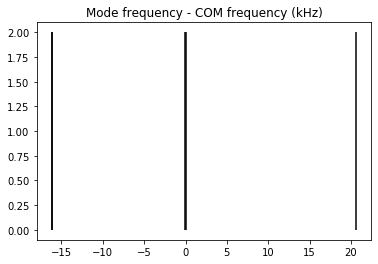

(array([ 0.43908279, -0.29278522,  0.56885711, -0.6244687 , -0.08901431]),
 957019.3178905598,
 0.4472135954999579)

In [167]:
adjusted_freqs = (z_freqs - z_freqs[-1])/1000
plt.vlines(adjusted_freqs, [0]*N, [2]*N)
plt.title('Mode frequency - COM frequency (kHz)')
plt.show()

# Check COM mode is 1/np.sqrt(N)
z_vecs[:,N-1], np.sqrt(np.abs(z_vals[N-1]))/2/np.pi, 1/np.sqrt(N)

In [168]:
# Compute y modes
y_vals, y_vecs = np.linalg.eig(normal_modes(wy))
y_freqs = np.round(np.sqrt(np.abs(y_vals))/2/np.pi)
y_freqs, np.round(y_vecs, 4)

(array([ 64814., 273487., 273225., 210350., 210033.]),
 array([[-0.4468, -0.5153, -0.3705, -0.4525,  0.4391],
        [-0.4476,  0.2018,  0.5981, -0.5617, -0.2928],
        [-0.4471,  0.6309, -0.0061,  0.28  ,  0.5689],
        [-0.4479,  0.1904, -0.6006,  0.1113, -0.6245],
        [-0.4466, -0.5094,  0.3797,  0.6237, -0.089 ]]))

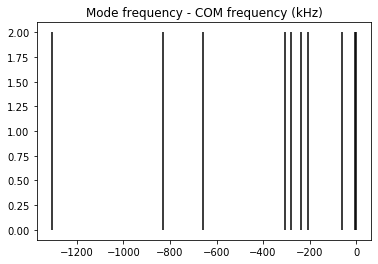

(array([0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
        0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777]),
 4800000.0,
 0.31622776601683794)

In [145]:
adjusted_freqs = (y_freqs - y_freqs[-1])/1000
plt.vlines(adjusted_freqs, [0]*N, [2]*N)
plt.title('Mode frequency - COM frequency (kHz)')
plt.show()

# Check COM mode is 1/np.sqrt(N)
y_vecs[:,9], np.sqrt(np.abs(y_vals[9]))/2/np.pi, 1/np.sqrt(N)

In [146]:
# Compute z modes

# THERE SHOULD NOT BE MODES LOWER THAN THE COM MODE (in the axial direction)

z_vals, z_vecs = np.linalg.eig(normal_modes(wz))
z_freqs = np.round(np.sqrt(np.abs(z_vals))/2/np.pi)
z_freqs, np.round(z_vecs, 4)

(array([2507544., 1109421., 3137589., 2212391.,  641677.,  962327.,
        1362686., 1268873.,  980242., 1000000.]),
 array([[ 1.    ,  0.0642, -0.0216,  0.2875,  0.3101,  0.0503, -0.0093,
         -0.056 ,  0.4627,  0.3162],
        [ 0.    ,  0.9979, -0.0022, -0.013 ,  0.734 , -0.0173,  0.0079,
          0.047 ,  0.461 ,  0.3162],
        [ 0.    ,  0.    ,  0.9998,  0.1858,  0.0036,  0.454 , -0.0527,
         -0.2793,  0.095 ,  0.3162],
        [ 0.    ,  0.    ,  0.    ,  0.9395,  0.0146,  0.5613, -0.0864,
         -0.5473,  0.2612,  0.3162],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.6041, -0.0291, -0.0015,
          0.0111,  0.4675,  0.3162],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.6893, -0.0941,
         -0.5864,  0.1157,  0.3162],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.9903,
          0.4301,  0.0061,  0.3162],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.2969,  0.0177,  0.3162],
        [ 

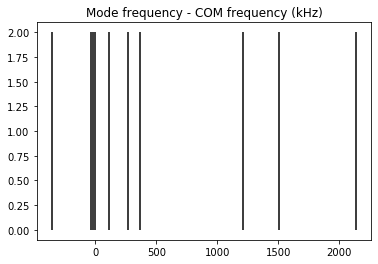

(array([0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
        0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777]),
 1000000.0,
 0.31622776601683794)

In [147]:
adjusted_freqs = (np.abs(z_freqs) - z_freqs[-1])/1000
plt.vlines(adjusted_freqs, [0]*N, [2]*N)
plt.title('Mode frequency - COM frequency (kHz)')
plt.show()

# Check COM mode is 1/np.sqrt(N)
z_vecs[:,9], np.sqrt(np.abs(z_vals[9]))/2/np.pi, 1/np.sqrt(N)

### Ion-ion interactions
The effective interaction term is along kth axis is

$$
J_{ij} = \Omega^2 \frac{\hbar \Delta k^2}{2 m}\sum_{m=1}^N\frac{b_{im} b_{jm}}{\mu^2-(\omega_m^k)^2}
$$

where $b_{im}$ is the normal mode eigenvector component of the ith ion in mode m.

In [8]:
hbar = 1.054571817e-34
Omega = 2*np.pi * 1.5e6
dk = np.sqrt(2) / 355e-9
mu = 2*np.pi * 350e3

def J_ij(i, j, i_eig_vec, j_eig_vec, mu, ws, Omega=Omega, m=m, hbar=hbar, dk=dk):
    prefactor = Omega**2 * hbar*dk**2/2/m
    num_modes = i_eig_vec.shape[1]
    J_ij = 0
    for m in range(num_modes):
        J_ij += (i_eig_vec[i,m] * j_eig_vec[j,m])/(mu**2 - ws[m]**2)
    return prefactor * i_eig_vec[i]
